National Taiwan University  
Geography Master Program YANG YU HSIANG

國立臺灣大學  
地理環境資源學系碩士班 楊宇翔


In [73]:
import sys
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
import sys
import os
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [76]:
import os
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
world = gpd.read_file("/content/drive/MyDrive/shape/countries.shp")

In [78]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

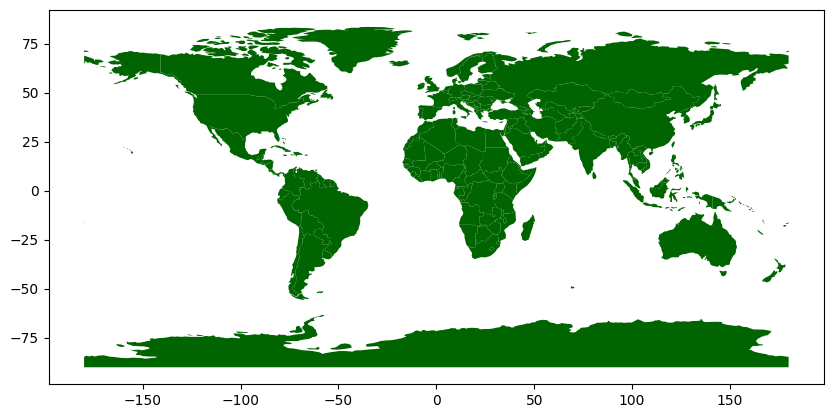

In [79]:
world.plot(figsize=(10, 5), color="darkgreen")

In [80]:
type (world.iloc[0].geometry)

shapely.geometry.multipolygon.MultiPolygon

In [81]:
print (world.iloc[0].geometry)

MULTIPOLYGON (((180 -16.067132663642447, 180 -16.555216566639196, 179.36414266196414 -16.801354076946883, 178.72505936299711 -17.01204167436804, 178.59683859511713 -16.639150000000004, 179.0966093629971 -16.433984277547403, 179.4135093629971 -16.379054277547404, 180 -16.067132663642447)), ((178.12557 -17.50481, 178.3736 -17.33992, 178.71806 -17.62846, 178.55271 -18.15059, 177.93266000000003 -18.28799, 177.38146 -18.16432, 177.28504 -17.72465, 177.67087 -17.381140000000002, 178.12557 -17.50481)), ((-179.79332010904864 -16.020882256741224, -179.9173693847653 -16.501783135649397, -180 -16.555216566639196, -180 -16.067132663642447, -179.79332010904864 -16.020882256741224)))


In [82]:
len(world) #there are 177 countries.

177

In [83]:
# Get the area of the Polygon
world_area = world.area

In [84]:
world_area

0         1.639511
1        76.301964
2         8.603984
3      1712.995228
4      1122.281921
          ...     
172       8.604719
173       1.479321
174       1.231641
175       0.639000
176      51.196106
Length: 177, dtype: float64

In [85]:
world['area'] = world.area #add new column


In [86]:
world['length']=world.length #add new column

In [87]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area,length
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511,8.991010
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964,37.260671
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984,27.662143
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228,916.062855
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921,356.977119
...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",8.604719,16.326071
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.479321,5.679511
174,1895250,Europe,Kosovo,XKS,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",1.231641,4.938975
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.639000,3.387105


In [88]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'area', 'length'],
      dtype='object')

In [89]:
world.name

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [90]:
country_name=list(world.name)
print (country_name)

['Fiji', 'Tanzania', 'W. Sahara', 'Canada', 'United States of America', 'Kazakhstan', 'Uzbekistan', 'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile', 'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti', 'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway', 'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste', 'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil', 'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua', 'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela', 'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico', 'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon', 'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.', 'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'Mozambique', 'eSwatini', 'Angola', 'Burundi', 'Israel', 'Lebanon', 'Madagascar', 'Palestine', 'Gambia', '

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'area', 'length', 'gdp_per_cap'],
      dtype='object')

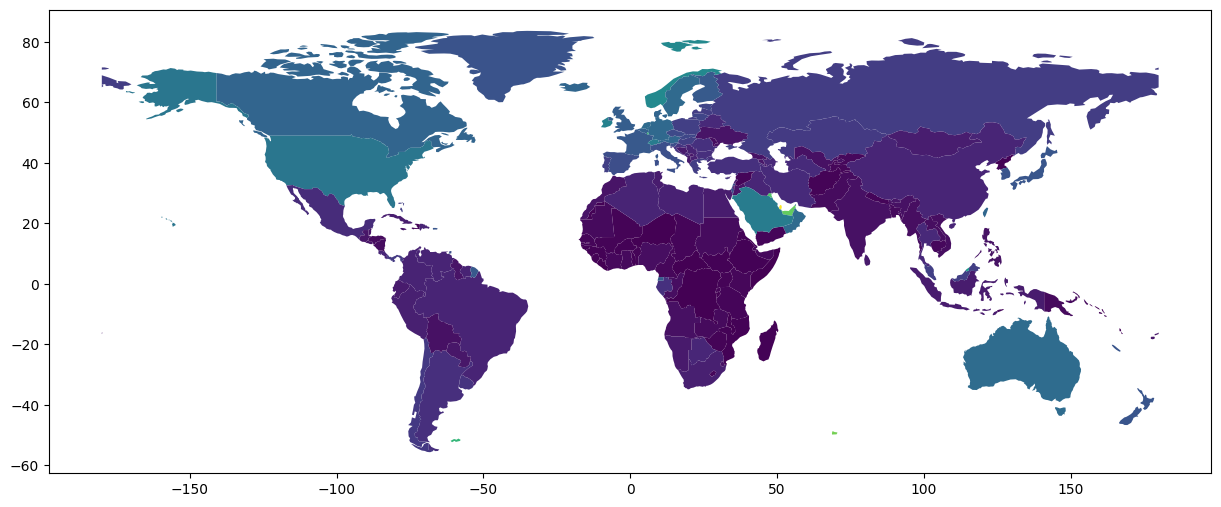

In [91]:
# 做些篩選與計算，人均GDP
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap',figsize=(15, 10))
# 增加了一個新變數
world.columns

<Axes: >

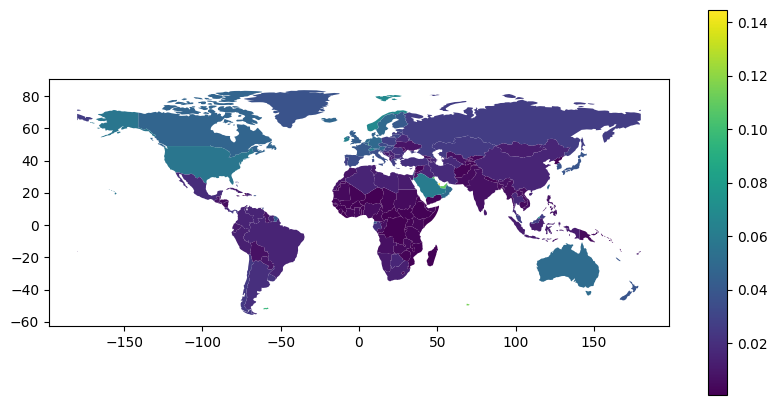

In [92]:
# 加圖例
world.plot(column='gdp_per_cap', figsize=(10, 5), legend=True)

<Axes: >

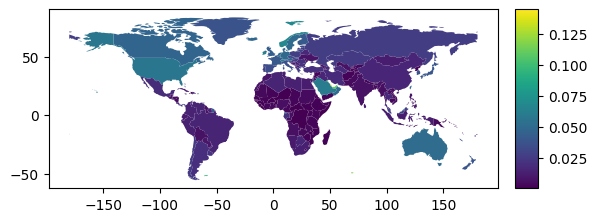

In [93]:
# 調整圖例尺寸
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world.plot(column='gdp_per_cap', ax=ax,figsize=(10, 5), legend=True, cax=cax)


<Axes: >

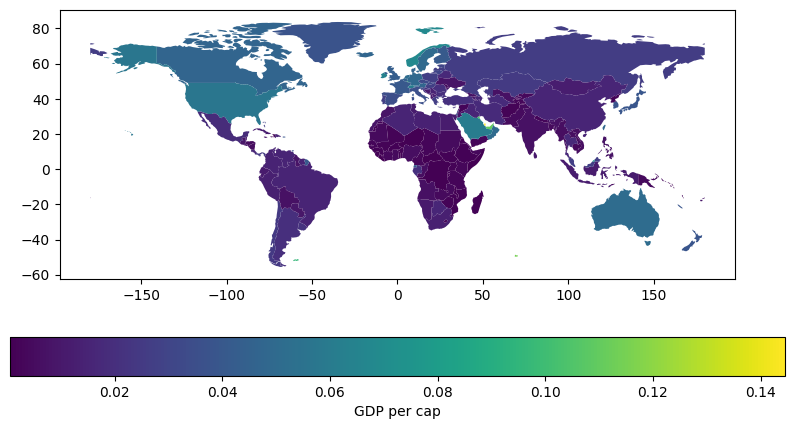

In [94]:
# 圖例改為橫向
world.plot(column='gdp_per_cap',
           legend=True,
           figsize=(10, 5),
           legend_kwds={'label': "GDP per cap",
                        'orientation': "horizontal"})

<Axes: >

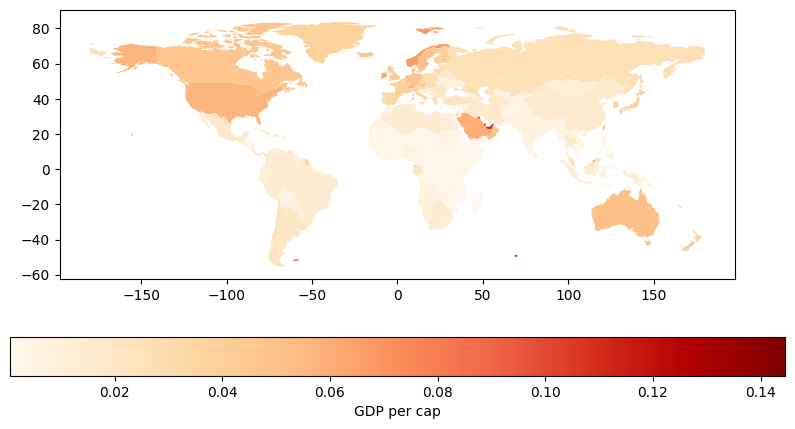

In [95]:
# 改變色系
world.plot(column='gdp_per_cap', figsize=(10, 5), legend=True,  cmap='OrRd',
          legend_kwds={'label': "GDP per cap",
                        'orientation': "horizontal"})

# boundary

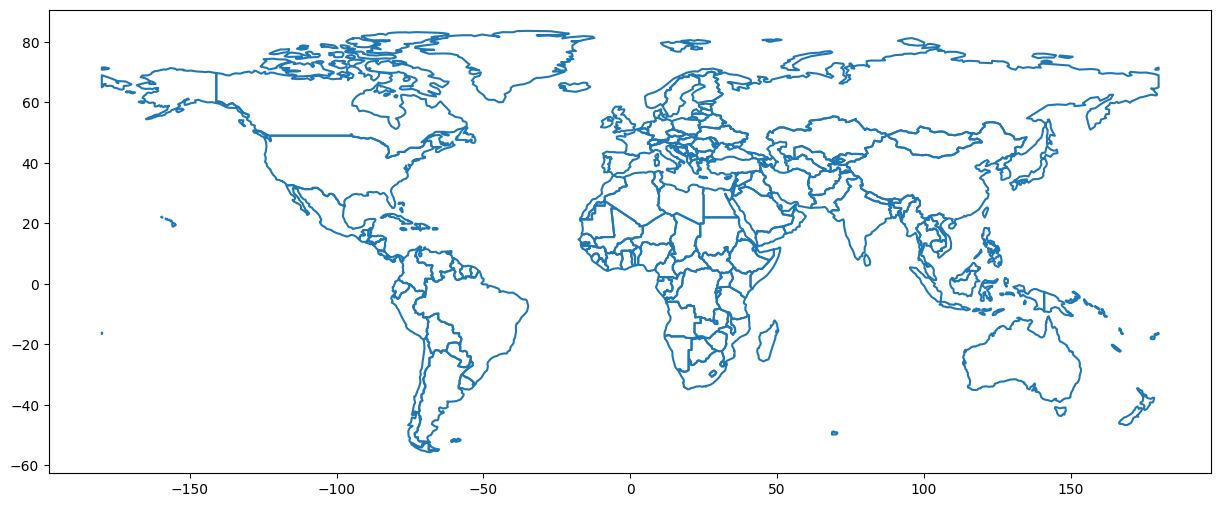

In [96]:
# 只畫邊界線
world.boundary.plot(figsize=(15, 10));

# world 匯進  V-dem 資料

In [97]:
# world 匯進  V-dem 資料
# world 有，V-dem 沒有者，自動刪除
# V-dem 有， world沒有者，無法匯人，視同不存在
# 首先要有共同的欄位 iso_a3
# csv 存檔時，Tools>web選項>編碼，要選 unicode(utf-8)
# 欄位名稱必須是英文。geopandas 可貯存 shapefile 檔。

In [98]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/v_dem_2020.xlsx')
df.head()

,no,CountryName,iso_a3,year,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem,demo,cate,edu,area,region,eco_dev,gdp_c,ferti,life,popu
0,1,Afghanistan,AFG,2020,0.366,0.192,0.151,0.289,0.142,0.2280,1,3.813,643557.141,14,-0.04,1934.56,4.47,63.7,37172386.0
1,2,Albania,ALB,2020,0.501,0.403,0.316,0.221,0.372,0.3626,2,NaN,28680.714,3,0.04,11104.17,1.62,78.3,2866376.0
2,3,Algeria,DZA,2020,0.277,0.147,0.111,0.185,0.251,0.1942,1,7.300,2326148.441,5,0.00,14228.02,3.02,77.9,42228429.0
3,4,Angola,AGO,2020,0.346,0.212,0.104,0.190,0.147,0.1998,1,2.980,1254965.956,7,-0.05,7771.44,5.52,64.6,30809762.0
4,5,Argentina,ARG,2020,0.831,0.670,0.547,0.685,0.656,0.6778,3,8.770,2787442.098,18,-0.03,18556.38,2.26,76.8,44494502.0


In [99]:
# v-dem 內的國家
vdm_name=set(df.iso_a3)
len(vdm_name)

170

In [100]:
# world 內的國家
world_name=set(world.iso_a3)
len(world_name)

176

In [101]:
# world 有，v-dem 沒有者，會被刪除
dif1=world_name-vdm_name
print (len(dif1),dif1)

18 {'ARM', 'XKS', 'ATF', 'PSE', 'FLK', 'NCL', 'BLZ', 'GIN', 'BRN', 'MKD', 'MNE', 'ESH', 'PRI', 'GNQ', 'GRL', 'SOL', 'BHS', 'NCP'}


In [102]:
# v-dem 有，world沒有者，無法匯入
dif2=vdm_name-world_name
print (len(dif2),dif2)

12 {'MLT', 'MDV', 'BHR', 'HKG', 'COM', 'BRB', 'CPV', 'SYC', 'XKX', 'SGP', 'PSG', 'MUS'}


In [103]:
world_data =world.merge(df,on = 'iso_a3',how = 'left') #左連線，左側DataFrame取全部，右側DataFrame取部分
world_data

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area_x,length,gdp_per_cap,no,...,demo,cate,edu,area_y,region,eco_dev,gdp_c,ferti,life,popu
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511,8.991010,0.009093,50.0,...,0.3044,2.0,8.248,18172.866,15.0,NaN,NaN,2.77,68.2,883483.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964,37.260671,0.002791,149.0,...,0.3272,2.0,3.645,947555.660,8.0,0.04,2874.96,4.89,67.3,56318348.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",8.603984,27.662143,0.001503,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228,916.062855,0.046991,26.0,...,0.7514,3.0,13.080,9923995.405,16.0,0.01,44868.74,1.50,82.1,37058856.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921,356.977119,0.056823,162.0,...,0.6678,3.0,13.610,9468306.220,16.0,0.02,55334.74,1.73,78.6,327167434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",8.604719,16.326071,0.014316,129.0,...,0.2736,1.0,NaN,77201.660,3.0,0.05,14124.12,1.49,75.9,6982084.0
172,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",1.479321,5.679511,0.016512,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,1895250,Europe,Kosovo,XKS,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",1.231641,4.938975,0.009756,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.639000,3.387105,0.035766,154.0,...,0.6352,3.0,9.551,5041.729,19.0,0.00,28549.41,1.73,74.4,1389858.0


In [104]:
# 執行匯入， world 有，v-dem 沒有者，會被刪除
world_data2 = world.merge(df, on='iso_a3')
world_data2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area_x,length,gdp_per_cap,no,...,demo,cate,edu,area_y,region,eco_dev,gdp_c,ferti,life,popu
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1.639511,8.991010,0.009093,50,...,0.3044,2,8.248,18172.866,15,NaN,NaN,2.77,68.2,883483.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",76.301964,37.260671,0.002791,149,...,0.3272,2,3.645,947555.660,8,0.04,2874.96,4.89,67.3,56318348.0
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228,916.062855,0.046991,26,...,0.7514,3,13.080,9923995.405,16,0.01,44868.74,1.50,82.1,37058856.0
3,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921,356.977119,0.056823,162,...,0.6678,3,13.610,9468306.220,16,0.02,55334.74,1.73,78.6,327167434.0
4,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",330.586822,122.535682,0.024827,77,...,0.1546,1,11.748,2721207.079,11,0.03,25307.56,2.84,72.5,18276499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",1.899400,6.034727,0.001846,126,...,0.1664,1,3.478,25305.624,8,0.06,1929.29,4.04,68.8,12301939.0
154,3856181,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",5.696666,10.737947,0.011029,17,...,0.3868,2,NaN,51537.975,3,0.04,10460.52,1.27,76.9,3323929.0
155,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",8.604719,16.326071,0.014316,129,...,0.2736,1,NaN,77201.660,3,0.05,14124.12,1.49,75.9,6982084.0
156,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.639000,3.387105,0.035766,154,...,0.6352,3,9.551,5041.729,19,0.00,28549.41,1.73,74.4,1389858.0


In [105]:
world_data.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry',
       'area_x', 'length', 'gdp_per_cap', 'no', 'CountryName', 'year',
       'v2x_polyarchy', 'v2x_libdem', 'v2x_partipdem', 'v2x_delibdem',
       'v2x_egaldem', 'demo', 'cate', 'edu', 'area_y', 'region', 'eco_dev',
       'gdp_c', 'ferti', 'life', 'popu'],
      dtype='object')

# save

In [106]:
# save
world_data.to_file("/content/drive/MyDrive/shape/world_data.shp")

<Axes: >

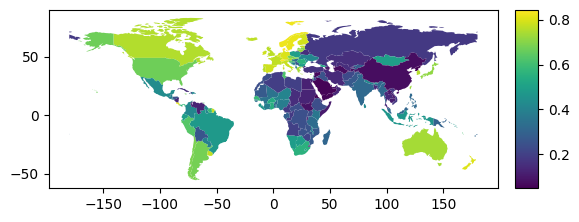

In [107]:
# demo 民主的綜合指標，nan 自動人刪除
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
world_data.plot(column='demo', ax=ax,figsize=(15, 10), legend=True, cax=cax)

# 繪製 missing

<Axes: >

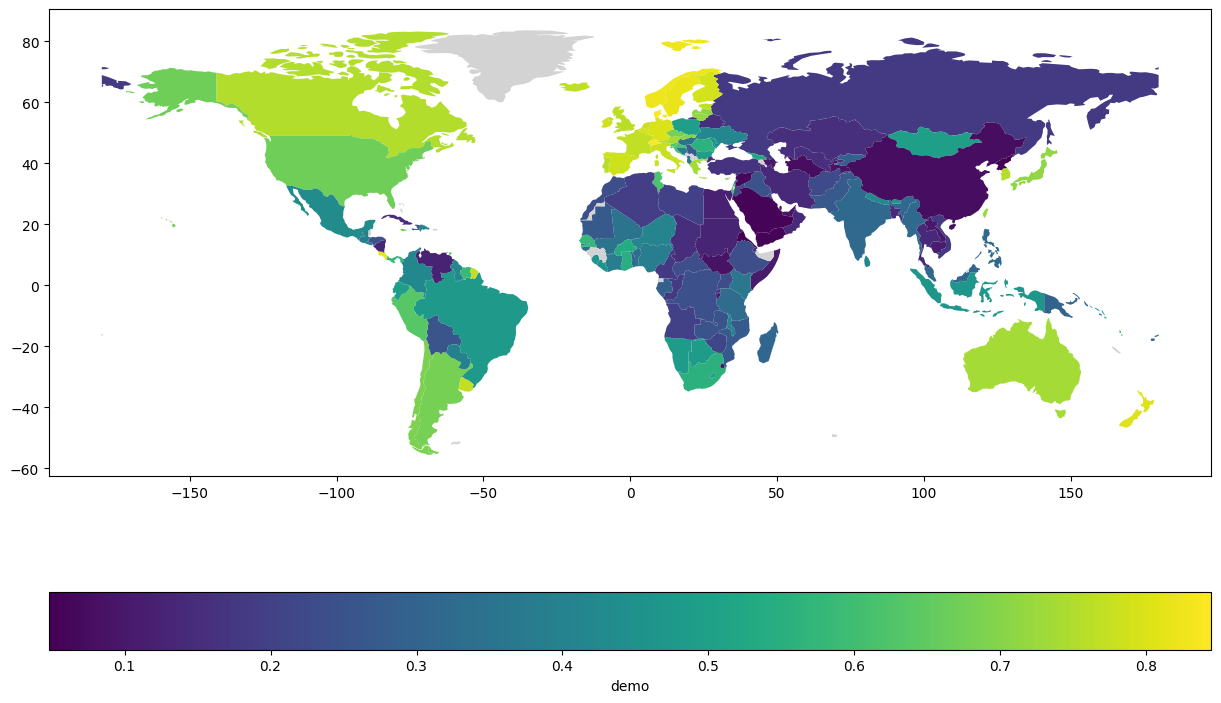

In [108]:
# nan 淺灰色
world_data.plot(column='demo', figsize=(15, 10), legend=True,
        legend_kwds={'label': "demo",'orientation': "horizontal"} ,
        missing_kwds={'color': 'lightgrey'})

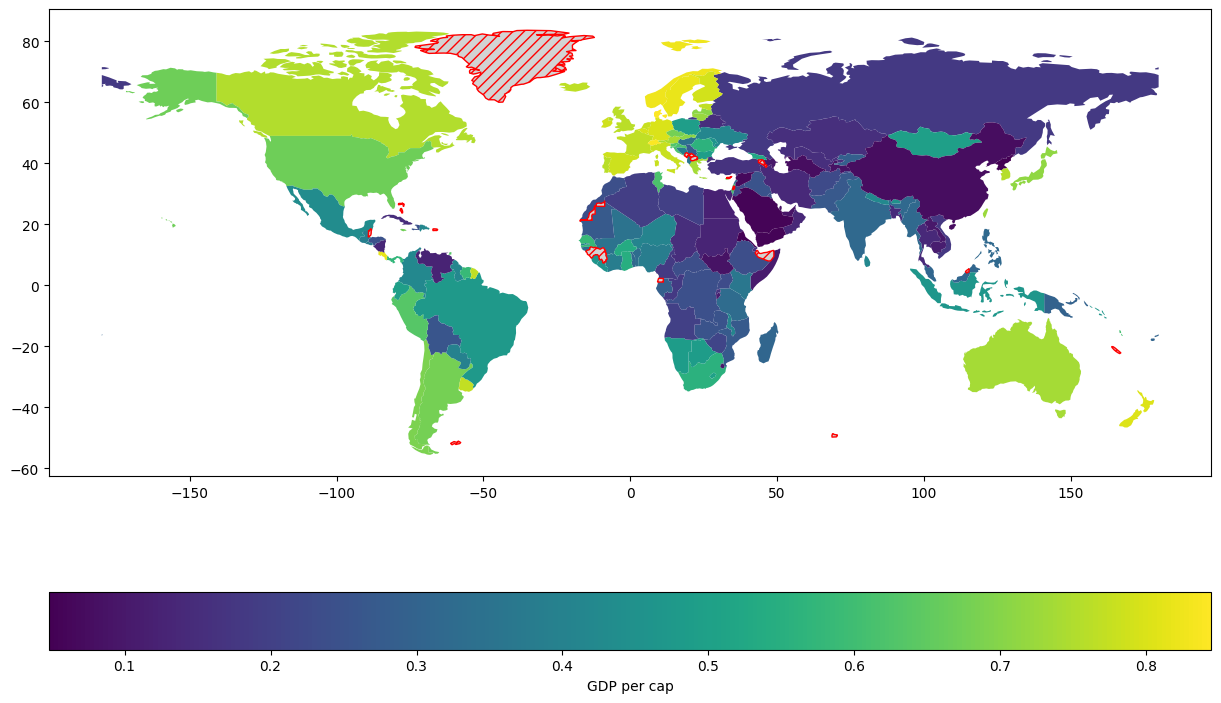

In [109]:
# missing 灰底加紅色斜線
world_data.plot(
    column="demo",
    legend=True,
    figsize=(15, 10),
    legend_kwds={'label': "GDP per cap",'orientation': "horizontal"},
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

# 選取部分的洲

39
47


<Axes: >

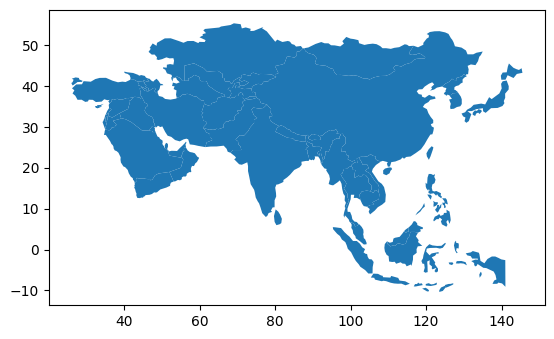

In [110]:
#%% append
# 歐洲和亞洲加在一起
europe = world_data[world_data.continent == 'Europe']
print (len(europe))
asia = world_data[world_data.continent == 'Asia']
print (len(asia))
#eurasia = europe.append(asia)
#print (len(eurasia))
#eurasia
#eurasia.columns
asia.plot()

<Axes: >

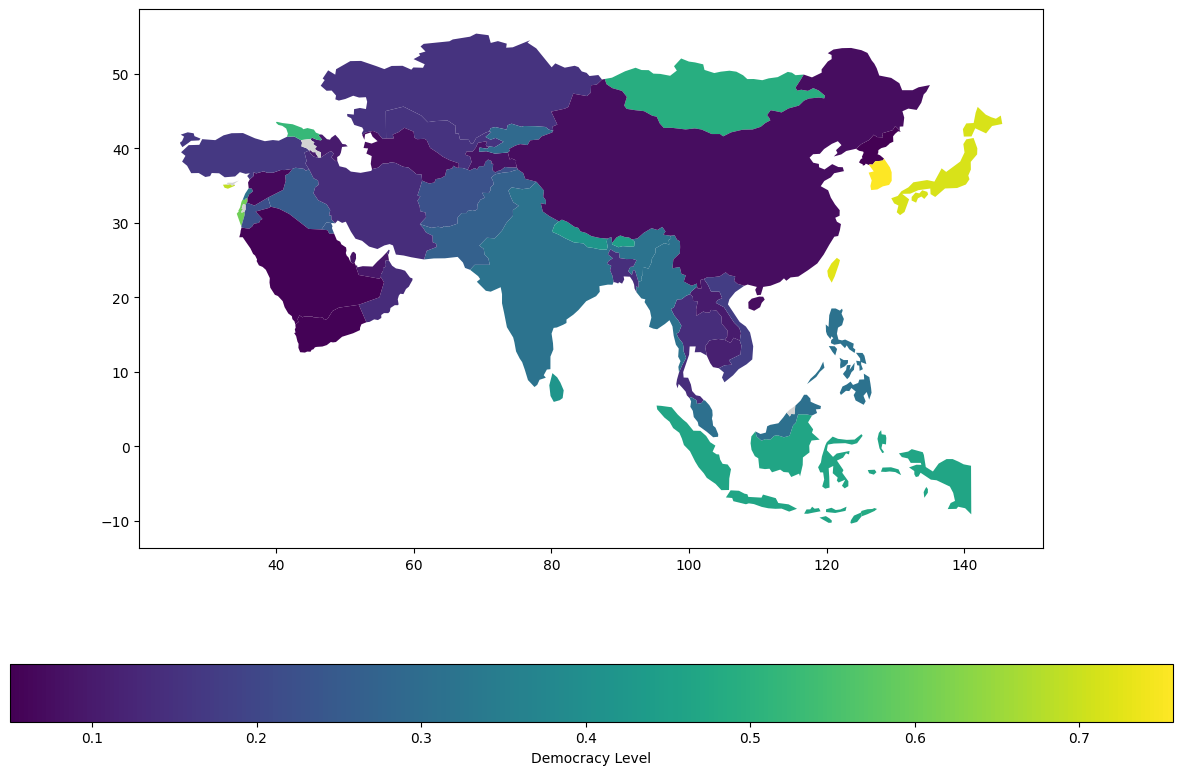

In [111]:
# nan 淺灰色
#eurasia.plot(column='demo', figsize=(15, 10), legend=True,
asia.plot(column='demo', figsize=(15, 10), legend=True,
             legend_kwds={'label': "Democracy Level",'orientation': "horizontal"},
             missing_kwds={'color': 'lightgrey'})

<Axes: >

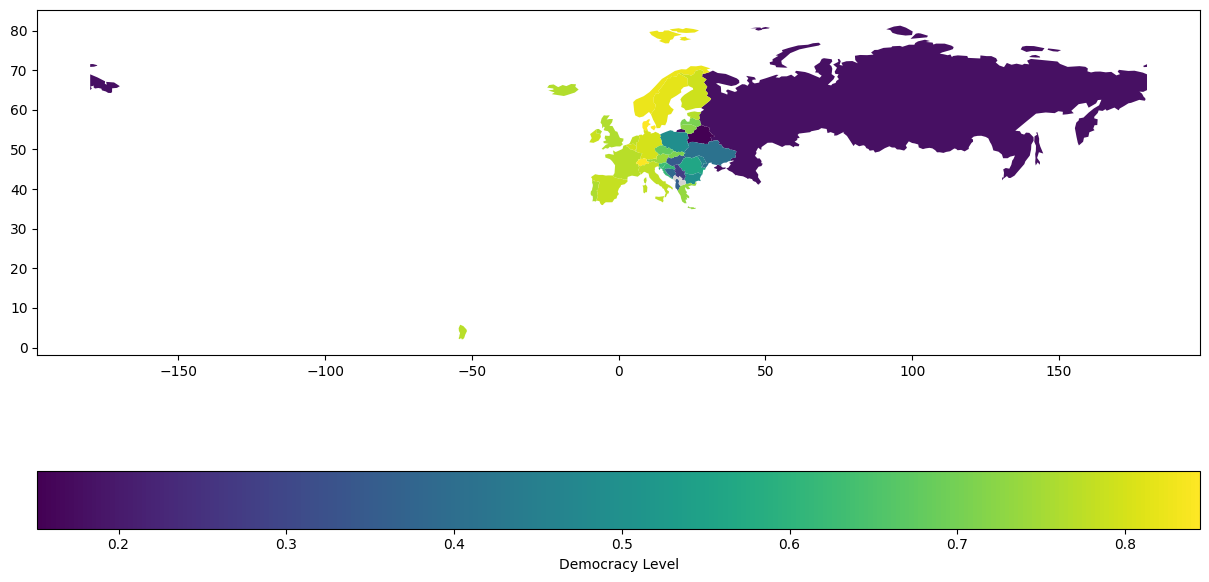

In [112]:
europe.plot(column='demo', figsize=(15, 10), legend=True,
             legend_kwds={'label': "Democracy Level",'orientation': "horizontal"},
             missing_kwds={'color': 'lightgrey'})

<Axes: >

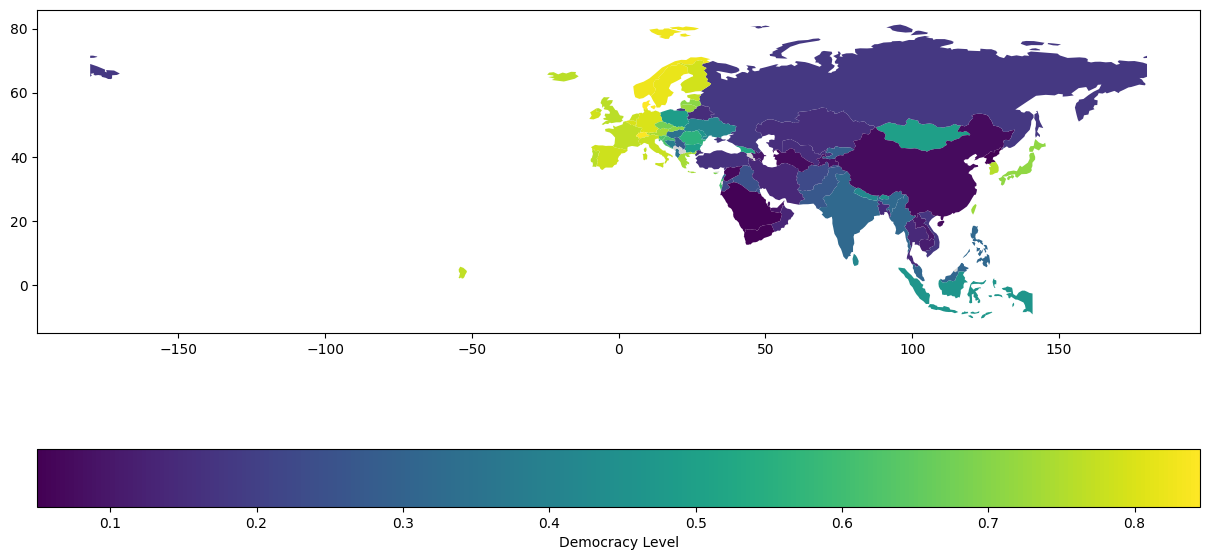

In [113]:
# Assuming gdf1 and gdf2 are your GeoDataFrames
combined_gdf = pd.concat([asia, europe])
combined_gdf.plot(column='demo', figsize=(15, 10), legend=True,
             legend_kwds={'label': "Democracy Level",'orientation': "horizontal"},
             missing_kwds={'color': 'lightgrey'})